In [25]:
import argparse
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from ast import literal_eval

import warnings
warnings.filterwarnings("ignore")

In [26]:
from src.tmdb_model import tmdb_model
from src.tmdb_linreg import tmdb_linreg

In [28]:
data = pd.read_csv('../02_Data/2B_data-output.csv', index_col=0)

In [23]:
data.head(6)

,opening_revenue,budget,runtime,position_in_series,previous_film_release,previous_film_rating,cast_xp_median,cast_rating_max,writer_xp_median,writer_xp_sum,...,is_may,is_jun,is_jul,is_aug,is_sep,is_oct,is_nov,is_dec,first_time_writers,first_time_directors
id,,,,,,,,,,,,,,,,,,,,,
59,364000.0,32000000.0,96.0,1,0.0,0.0,43.0,8.500,3.5,7.0,...,0,0,0,0,1,0,0,0,0,0
8976,7576593.0,30000000.0,107.0,1,0.0,0.0,12.0,7.574,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
10077,917398.0,80000000.0,101.0,1,0.0,0.0,21.0,10.000,6.0,62.0,...,1,0,0,0,0,0,0,0,0,0
8202,12661112.0,62000000.0,93.0,1,0.0,0.0,23.0,10.000,4.0,17.0,...,0,0,0,0,0,0,1,0,0,0
22559,479368.0,26000000.0,95.0,1,0.0,0.0,2.0,8.400,7.0,7.0,...,0,0,0,0,0,0,0,0,0,0
12142,2834421.0,20000000.0,98.0,1,0.0,0.0,21.0,10.000,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0


                             OLS Regression Results                             
Dep. Variable:     sqrt_opening_revenue   R-squared:                       0.638
Model:                              OLS   Adj. R-squared:                  0.620
Method:                   Least Squares   F-statistic:                     34.22
Date:                  Fri, 01 Nov 2024   Prob (F-statistic):           1.32e-90
Time:                          10:27:18   Log-Likelihood:                -843.29
No. Observations:                   511   AIC:                             1739.
Df Residuals:                       485   BIC:                             1849.
Df Model:                            25                                         
Covariance Type:              nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
cons

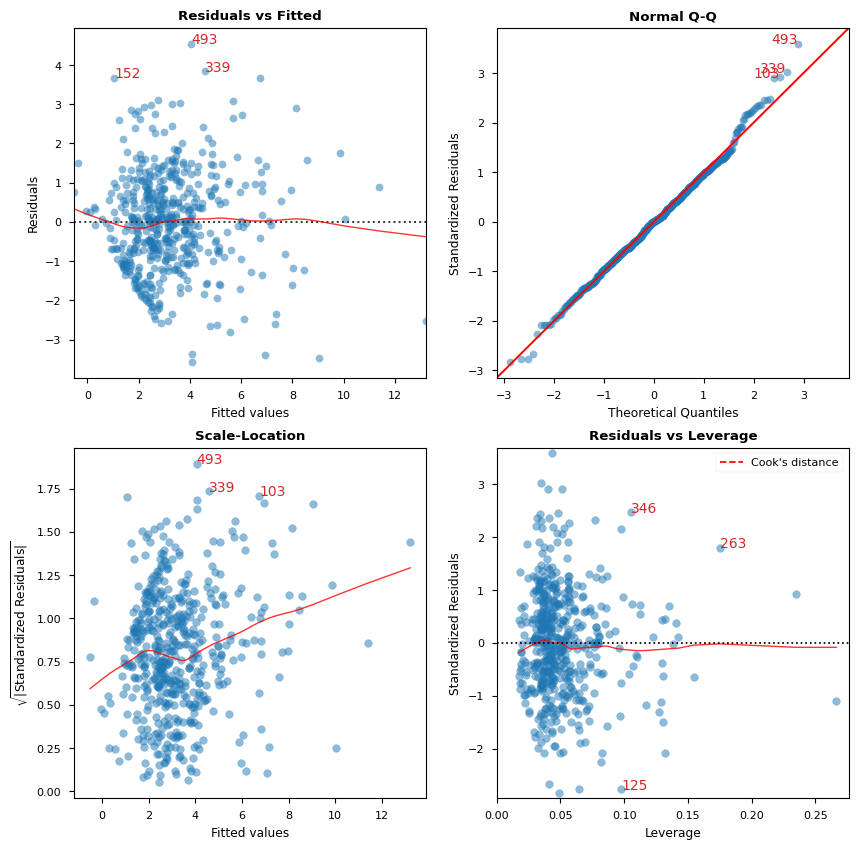

In [29]:
# Initialize TMDB model class.
mdl = tmdb_model()

cdf = data
cdf['opening_revenue'] = cdf['opening_revenue'].div(1E6)
cdf['budget'] = cdf['budget'].div(1E6)

# Generate pair plot of continuous covariates.
#sns.pairplot(cdf[['opening_revenue', 'budget', 'num_production_companies', 'runtime', 'month', 'pct_indie']])

# Generate transformed covariates.
cov_transform = {'opening_revenue': 'sqrt'}

# Generate joint covariates.
month_id = ['is_jan', 'is_feb', 'is_mar', 'is_apr', 'is_may', 'is_jun', \
            'is_jul', 'is_aug', 'is_sep', 'is_oct', 'is_nov', 'is_dec']
genre_id = ['is_adventure', 'is_fantasy', 'is_animation', 'is_drama', 'is_horror', 'is_action', \
            'is_comedy', 'is_history', 'is_thriller', 'is_crime', 'is_documentary', 'is_sci_fi', \
            'is_mystery', 'is_music', 'is_romance', 'is_family']
season_id = ['is_winter', 'is_spring', 'is_summer', 'is_fall']

joint_id = []

for i in range(len(month_id)):

    for j in range(len(genre_id)):

        cdf[str(month_id[i] + '_*_' + genre_id[j])] = (cdf[month_id[i]] * cdf[genre_id[j]]) # Month-genre interaction
        joint_id.append(str(month_id[i] + '_*_' + genre_id[j]))

for i in range(len(genre_id)):

    for j in range((i+1), len(genre_id)):

        cdf[str(genre_id[i] + '_*_' + genre_id[j])] = (cdf[genre_id[i]] * cdf[genre_id[j]]) # Month-month interaction
        joint_id.append(str(genre_id[i] + '_*_' + genre_id[j]))

#cdf['is_series_*_is_sci_fi'] = (cdf['is_series'] * cdf['is_sci_fi'])                        # Series-genre interaction

# Generate OLS model.
model_cut = ['budget', 'num_production_companies', 'crew', 'cast_xp_median', 'previous_film_release', 'previous_film_rating', 'first_time_directors', \
            'is_feb', 'is_mar', 'is_apr', 'is_may', 'is_jun', 'is_jul', \
            'is_aug', 'is_sep', 'is_oct', 'is_nov', 'is_dec', \
            'is_horror', 'is_romance', 'is_comedy', 'is_family', \
            'is_oct_*_is_horror', 'is_dec_*_is_family', \
            'is_comedy_*_is_romance']

Y = ['opening_revenue']
X = model_cut

_, res = mdl.get_ols_model(cdf, Y, X, cov_transform=cov_transform)

# Generate linear regression diagnostics for OLS model.
print(res.summary())

diag = tmdb_linreg(res)
vif, fig, ax = diag()

In [48]:
print(res.summary().tables[1].as_latex_tabular().replace('\\textbf{', ''))

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                    & coef} & std err} & t} & P$> |$t$|$} & [0.025} & 0.975]}  \\
\midrule
const}                      &       2.2372  &        0.290     &     7.718  &         0.000        &        1.668    &        2.807     \\
budget}                     &       0.0319  &        0.002     &    17.804  &         0.000        &        0.028    &        0.035     \\
num\_production\_companies} &      -0.2779  &        0.069     &    -4.039  &         0.000        &       -0.413    &       -0.143     \\
crew}                       &       0.0031  &        0.001     &     3.951  &         0.000        &        0.002    &        0.005     \\
cast\_xp\_median}           &      -0.0083  &        0.004     &    -2.207  &         0.028        &       -0.016    &       -0.001     \\
previous\_film\_release}    &      -0.0003  &        0.000     &    -3.078  &         0.002        &       -0.001    &       -0.000     \\
previous\_

In [30]:
vif['VIF Factor'].mean()

2.992692307692308

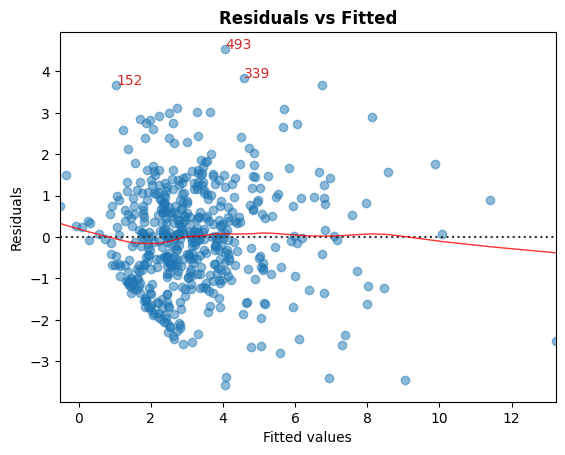

In [35]:
diag.residual_plot();
plt.show()

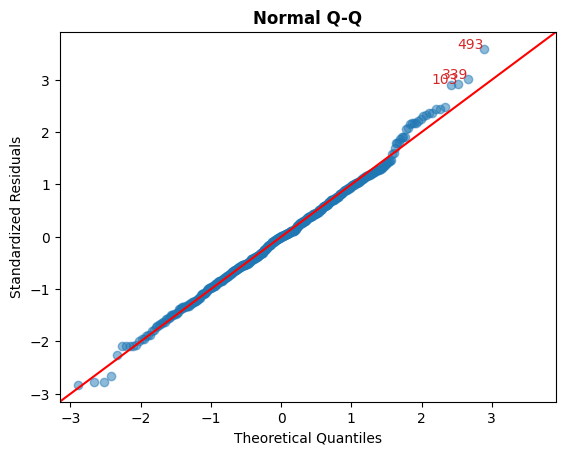

In [39]:
diag.qq_plot();
plt.show()

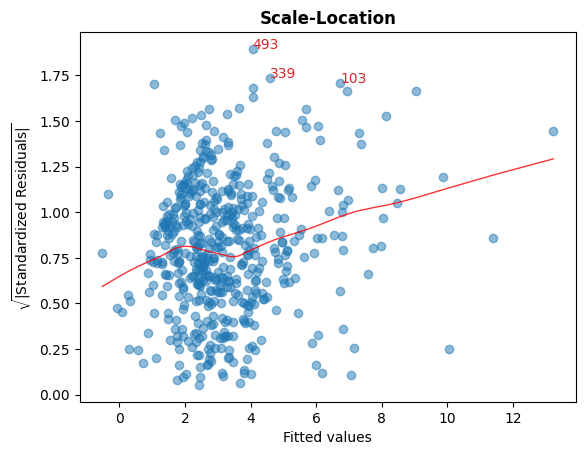

In [44]:
diag.scale_location_plot();
plt.show()

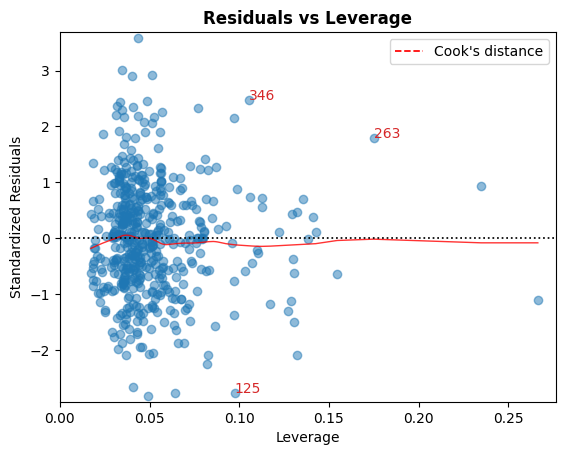

In [46]:
diag.leverage_plot();
plt.show()